In [ ]:
!pip install alpaca-trade-api
!pip install alpaca-py
!pip install pandas_market_calendars    

In [3]:
import pandas as pd
import pandas_market_calendars as mcal
from datetime import datetime
import time
import csv

from alpaca.data import StockHistoricalDataClient, TimeFrame
from alpaca.data.requests import StockBarsRequest

def trading_days(end_d, days_back):
   # today = pd.Timestamp.today(tz='America/New_York').normalize()
    # Get the NYSE calendar
    nyse = mcal.get_calendar('NYSE')
    # Get the schedule for the current year
    schedule = nyse.schedule(start_date=end_d - pd.Timedelta(days=days_back), end_date=end_d)

    # Get the dates of the last x trading days
    td = schedule.index[0 : days_back] 
    # Get the date x trading days ago
    #start_date = td[0]
    
    return td

# today = pd.Timestamp.today(tz='America/New_York').normalize()

# print(trading_days(today, 15))


In [5]:
path = "../Alpaca_Keys.csv"

with open(path, mode='r', newline='') as file:

    csv_reader = csv.reader(file)
    
    # Read the first line
    API_KEY = next(csv_reader)[0]
    ALPACA_API_SECRET_KEY = next(csv_reader)[0]
    

data_client = StockHistoricalDataClient(API_KEY, ALPACA_API_SECRET_KEY)

In [4]:
def call(start_date, stock, trading_days, percent_change):
    # Set the start time    
    # if start_date.tzinfo is None:
    #     start_time = pd.to_datetime(start_date).tz_localize('America/New_York')
    # else:
    #     start_time = pd.to_datetime(start_date).tz_convert('America/New_York')
    # Define the request parameters
    request_params = StockBarsRequest(
        symbol_or_symbols=[stock],              # stock will go here 
        timeframe=TimeFrame.Day,
        start=start_date
    )

    # Fetch the bars data
    bars_data = data_client.get_stock_bars(request_params)
    bars_df = bars_data.df
    
    # Reset the index to separate the columns
    bars_df = bars_df.reset_index()

    # Convert the timezone of the timestamp column
    bars_df['timestamp'] = bars_df['timestamp'].dt.tz_convert('America/New_York')

    # Set the index back to symbol and timestamp if needed
    bars_df = bars_df.set_index(['symbol', 'timestamp'])

    #percent_change = [[0, 0] for i in range(len(trading_days))]
    for i in range(len(trading_days)):
        specific_date = pd.to_datetime(trading_days[i]).tz_localize('America/New_York')
        #print(specific_date)
        open_price = bars_df.loc[('SPY', specific_date), 'open']
        close_price = bars_df.loc[('SPY', specific_date), 'close']
        #percent_change[i][0] = f"{specific_date.date()} "
        #percent_change[i][1] = ((close_price/open_price)-1)*100
        percent_change.insert(0, [f"{specific_date.date()} ", ((close_price/open_price)-1)*100])
    return percent_change

# start_date, td = trading_days(150)
# days = len(td)
# today = pd.Timestamp.today(tz='America/New_York').normalize()
# stock = "SPY"
# percent_change= []
# SPY_percent_change = call(start_date, stock, td, percent_change)

# file_path = "data.csv"
# with open(file_path, mode='a', newline='') as file:
#     writer = csv.writer(file)
    
#     # Write the new data rows
#     writer.writerows(percent_change)


In [73]:
def store_data(stock, percent_change):
    file_path = "Stocks/"+str(stock)+".csv"
    with open(file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(percent_change)

store_data(stock, SPY_percent_change)

In [66]:
array = []
array.append(["words", 4])

print(array)

[['words', 4]]


In [7]:
def create_data(stock, days_back):
    #break up days back into unders 150s calls
    today = pd.Timestamp.today(tz='America/New_York').normalize()
    percent_change = []
    
    count = days_back
    
    while(True):
        if count > 150:
            td= trading_days(today - pd.Timedelta(days=count-150), 150) # start and end dates
            start_date = today - pd.Timedelta(days=count)
            call(start_date, stock, td, percent_change)
            count -= 150
            print("minute delay here")
            time.sleep(60)
            print("ok")
        else: 
            td= trading_days(today, count)
            call(start_date, stock, td, percent_change)
            break
    print(percent_change)
            
create_data("SPY", 200)
    
    # for amount of breaks and data to start from do
    #calls with each of the staring 200 days
    # do all work like before (before or after previous data check)
    #write to csv
    #repeat above still get to today
    
    #store_data(stock, percent_change)
    # done

    
    
# # Define the start date
# start_date = today - pd.Timedelta(days=200)

# # Define the end date as 200 days after the start date, but ensure it's not today
# end_date = start_date + pd.Timedelta(days=200)
# if end_date >= today:
#     end_date = today - pd.Timedelta(days=1)  # Set end_date to yesterday

# # Get the schedule for the period from start_date to end_date
# schedule = nyse.schedule(start_date=start_date, end_date=end_date)
    

here4
exited loop
minute delay here
ok
here4
exited loop
[['2024-06-13 ', -0.1288778422166903], ['2024-06-12 ', -0.04984952827575828], ['2024-06-11 ', 0.5392551538187851], ['2024-06-10 ', 0.4651337259462096], ['2024-06-07 ', 0.06558482929206466], ['2024-06-06 ', -0.059815320198897126], ['2024-06-05 ', 0.7347815437948491], ['2024-06-04 ', 0.36659955172282377], ['2024-06-03 ', -0.23061509961816995], ['2024-05-31 ', 0.721938921675358], ['2024-05-30 ', -0.364142454053229], ['2024-05-29 ', 0.07989651499011874], ['2024-05-28 ', -0.08674826032022409], ['2024-05-24 ', 0.3012219380505776], ['2024-05-23 ', -1.313419393575499], ['2024-05-22 ', -0.1545274663148799], ['2024-05-21 ', 0.39298669891174587], ['2024-05-20 ', 0.09252789999432132], ['2024-05-17 ', 0.1210264556267937], ['2024-05-16 ', -0.22457914999621797], ['2024-05-15 ', 0.7511933514633862], ['2024-05-14 ', 0.4202567596092832], ['2024-05-13 ', -0.3157532149418163], ['2024-05-10 ', -0.18589141641591755], ['2024-05-09 ', 0.5392554795314863

['2024-06-03 ', '-0.23061509961816995']
['2024-06-04 ', '0.36659955172282377']


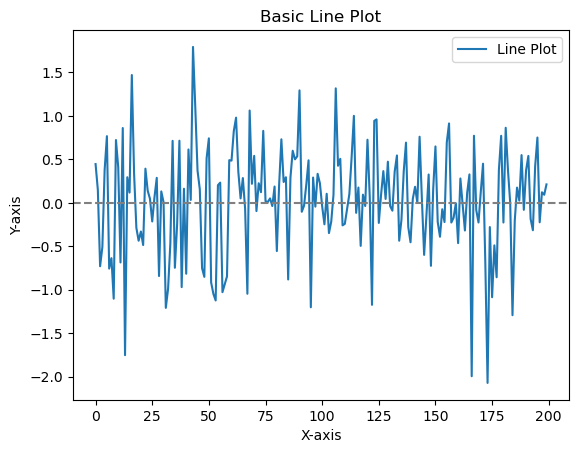

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the x and y axes
x = range(x_days)

y = []
for i in range(x_days):
    y.append(percent_change[i][1])# // percent change plot

# Create a basic line plot
plt.plot(x, y, label='Line Plot')

# Add title and labels
plt.title('Basic Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()
plt.axhline(y=0, color='gray', linestyle='--', label='y = 0')

# Display the plot
plt.show()

